# Deep ViT Features - Co-segmentation
Given a set of images, segment all the common objects among them.

In [1]:
#@title Installations and mounting
!pip install tqdm
!pip install faiss-cpu
!pip install timm
!pip install opencv-python
!pip install git+https://github.com/lucasb-eyer/pydensecrf.git
!git clone https://github.com/ShirAmir/dino-vit-features.git
import sys
sys.path.append('dino-vit-features')
%load_ext autoreload
%autoreload 2

  Running command git clone --filter=blob:none --quiet https://github.com/lucasb-eyer/pydensecrf.git 'C:\Users\a21ma\AppData\Local\Temp\pip-req-build-77wgoj66'
  error: subprocess-exited-with-error
  
  × Building wheel for pydensecrf (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\pydensecrf
      copying pydensecrf\utils.py -> build\lib.win-amd64-cpython-311\pydensecrf
      copying pydensecrf\__init__.py -> build\lib.win-amd64-cpython-311\pydensecrf
      running build_ext
      building 'pydensecrf.eigen' extension
      creating build\temp.win-amd64-cpython-311
      creating build\temp.win-amd64-cpython-311\Release
      creating build\temp.win-amd64-cpython-311\Release\pydensecrf
      "C:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MS


  Cloning https://github.com/lucasb-eyer/pydensecrf.git to c:\users\a21ma\appdata\local\temp\pip-req-build-77wgoj66
  Resolved https://github.com/lucasb-eyer/pydensecrf.git to commit dd070546eda51e21ab772ee6f14807c7f5b1548b
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pydensecrf


Cloning into 'dino-vit-features'...


## Change Runtime Type
To get a GPU in Google Colab, go to the top menu: Runtime ➔ Change runtime type and select GPU as Hardware accelerator.


In [6]:
#@title Configuration:
#@markdown Choose image paths:
images_paths = [r"C:\Users\a21ma\OneDrive\Desktop\Code\Projects\Brain Tumour Detection (IPD)\Datasets\Dataset 1\yes\Y1.jpg"] #@param
#@markdown Choose loading size:
load_size = 360 #@param
#@markdown Choose layer of descriptor:
layer = 11 #@param
#@markdown Choose facet of descriptor:
facet = 'key' #@param
#@markdown Choose if to use a binned descriptor:
bin=False #@param
#@markdown Choose fg / bg threshold:
thresh=0.165 #@param
#@markdown Choose model type:
model_type='dino_vits8' #@param
#@markdown Choose stride:
stride=4 #@param
#@markdown Choose elbow coefficient for setting number of clusters
elbow=0.975 #@param
#@markdown Choose percentage of votes to make a cluster salient.
votes_percentage=75 #@param
#@markdown Choose whether to remove outlier images
remove_outliers=False #@param
#@markdown Choose threshold to distinguish inliers from outliers
outliers_thresh=0.7 #@param
#@markdown Choose interval for sampling descriptors for training
sample_interval=100 #@param
#@markdown Use low resolution saliency maps -- reduces RAM usage.
low_res_saliency_maps=True #@param

Using cache found in C:\Users\a21ma/.cache\torch\hub\facebookresearch_dino_main
Using cache found in C:\Users\a21ma/.cache\torch\hub\facebookresearch_dino_main
c:\Users\a21ma\OneDrive\Desktop\Code\Projects\Brain Tumour Detection (IPD)\dino-vit-features\cosegmentation.py:160: RuntimeWarning: Mean of empty slice.
  label_saliency = saliency_map[image_labels[:, 0] == label].mean()
c:\Users\a21ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


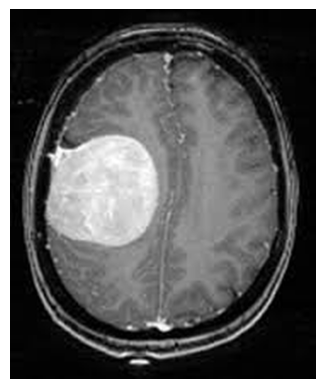

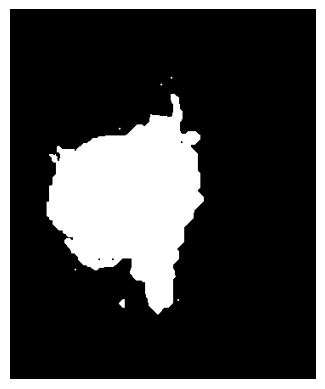

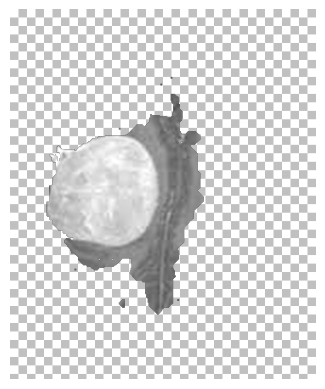

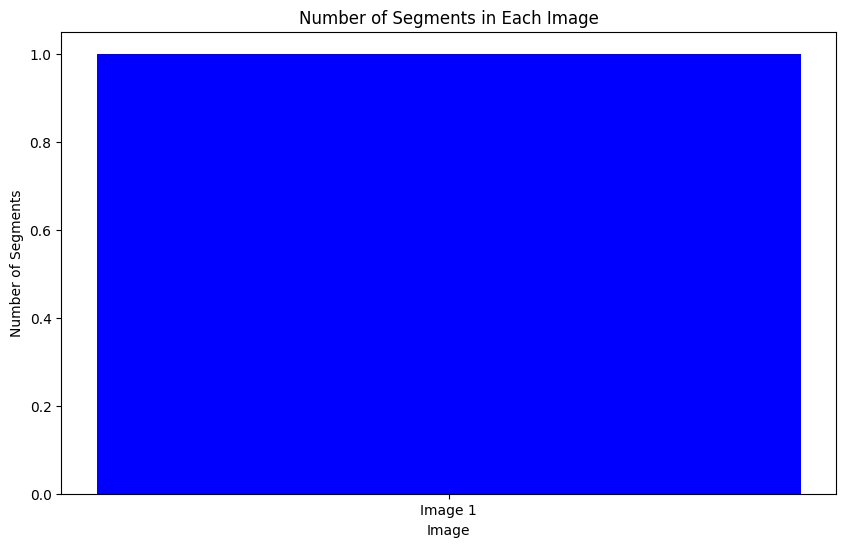

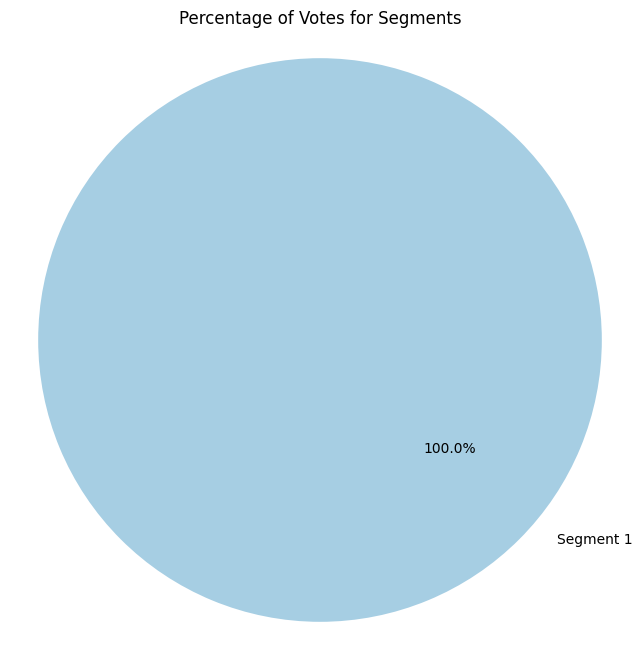

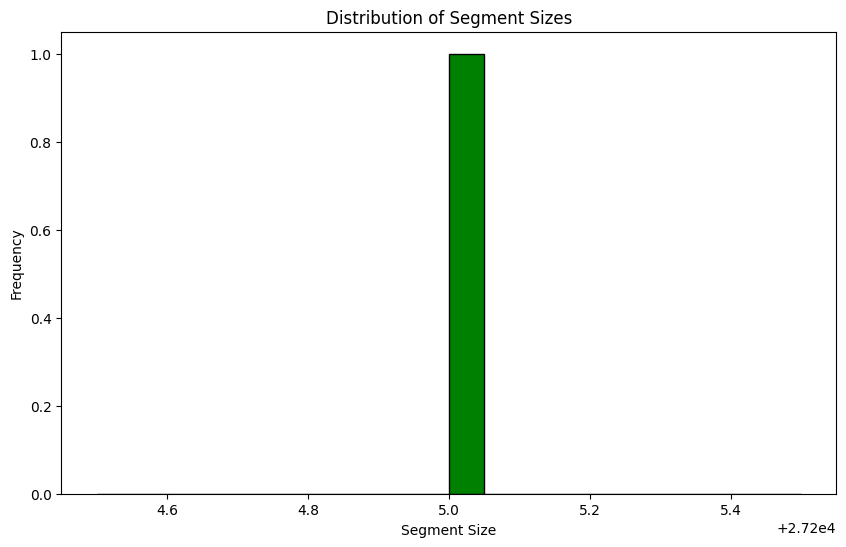

In [7]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from cosegmentation import find_cosegmentation, draw_cosegmentation, draw_cosegmentation_binary_masks

# Your existing code for computing cosegmentation
with torch.no_grad():
    seg_masks, pil_images = find_cosegmentation(images_paths, elbow, load_size, layer, facet, bin, thresh, model_type,
                                                stride, votes_percentage, sample_interval, remove_outliers,
                                                outliers_thresh, low_res_saliency_maps)
    figs, axes = [], []
    for pil_image in pil_images:
      fig, ax = plt.subplots()
      ax.axis('off')
      ax.imshow(pil_image)
      figs.append(fig)
      axes.append(ax)

    # saving cosegmentations
    binary_mask_figs = draw_cosegmentation_binary_masks(seg_masks)
    chessboard_bg_figs = draw_cosegmentation(seg_masks, pil_images)

    plt.show()

# Additional code for statistical plots
# Example 1: Bar Plot - Number of Segments in Each Image
num_segments = [np.max(np.array(mask)) for mask in seg_masks]
image_names = [f"Image {i+1}" for i in range(len(seg_masks))]

plt.figure(figsize=(10, 6))
plt.bar(image_names, num_segments, color='blue')
plt.xlabel('Image')
plt.ylabel('Number of Segments')
plt.title('Number of Segments in Each Image')
plt.show()

# Example 2: Pie Chart - Percentage of Votes for Segments
total_votes = sum([np.array(mask).sum() for mask in seg_masks])
segment_votes = [np.array(mask).sum() for mask in seg_masks]

labels = [f"Segment {i+1}" for i in range(len(segment_votes))]
sizes = [vote / total_votes * 100 for vote in segment_votes]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Votes for Segments')
plt.show()

# Example 3: Histogram - Distribution of Segment Sizes
segment_sizes = [np.array(mask).sum() for mask in seg_masks]

plt.figure(figsize=(10, 6))
plt.hist(segment_sizes, bins=20, color='green', edgecolor='black')
plt.xlabel('Segment Size')
plt.ylabel('Frequency')
plt.title('Distribution of Segment Sizes')
plt.show()
